<a href="https://colab.research.google.com/github/basartimucin/MPA-MLF/blob/main/Week3_Lab_02_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MPA-MLF, Lab 2 - K-means

# Exercise 1 - K-means from scratch

## Implementing K-means

### Code

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
import matplotlib.pyplot as plt
import copy
import numpy as np
from numpy.linalg import norm
from sklearn.cluster import KMeans

### 0. Load dataset

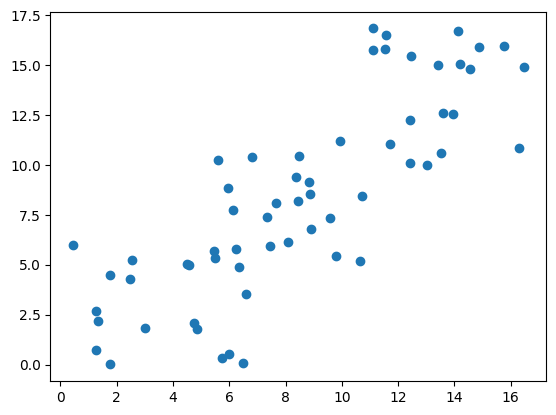

In [68]:
loaded_points = np.load('/content/drive/MyDrive/Lab_02/Data/k_mean_points.npy')

plt.figure()
plt.scatter(loaded_points[:,0],loaded_points[:,1])

### 1. Specify number of clusters *K*

In [69]:
k = 3

### 2. initialize centroids

There are more techniques, on how to change initial centroids. In out case, we will take all available points and shuffle them randomly, then we will choose first *k_clusters* points as initial centroids

In [70]:
def initialize_clusters(points: np.array, k_clusters: int) -> np.array:
    """
    Initializes and returns k random centroids from the given dataset.

    :param points: Array of data points.
    :type: points ndarray with shape (n, 2)

    :param k_clusters: The number of clusters to form
    :type k_clusters: int


    :return: initial_clusters
    initial_clusters: Array of initialized centroids

    :rtype:
    initial_clusters: np.array (k_clusters, 2)
    :

    """

    ###################################
    number_of_point = len(points)
    numbers = np.random.choice(number_of_point,size=3,replace=False)
    initial_clusters = points[numbers]
    ###################################

    return initial_clusters

### 3. Calculate distance from centroids to all points in datasets

In [71]:
def calculate_metric(points: np.array, centroid: np.array) -> np.array:
    """
    Calculates the distance metric between each point and a given centroid.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param centroid: A single centroid
    :type centroid: ndarray with shape (1, 2)

    :return: distances_array
    distances_array: Array of distances from point to centroid

    :rtype:
    distances_array: ndarray with shape (n,)
    :
    """

    ###################################

    distances_array= norm(points-centroid, axis=1)
    ###################################

    return distances_array

3.2 Secondly, create a function to calculate distance between points and all centroids using function from 3.1

In [72]:
def compute_distances(points: np.array, centroids_points: np.array) -> np.array:
    """
    Computes and returns the distance from each point to each centroid.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param centroids_points: A all centroid points
    :type centroids_points: ndarray with shape (k_clusters, 2)


    :return: distances_array
    distances_array: 2D array with distances of each point to each centroid.

    :rtype:
    distances_array: ndarray of shape (k_clusters, n)
    """
    ###################################
    all_distances =[]

    for centroid in centroids_points:
      distances_per_one_centroid = calculate_metric(points,centroid)
      all_distances.append(distances_per_one_centroid)

    distances_array = np.asarray(all_distances)

    ###################################

    return distances_array

### 4. Assign datapoints to the closest centroids

In [73]:
def assign_centroids(distances: np.array) -> np.array:
    """
    Assigns each point to the closest centroid based on the distances.

    Parameters:
    :param distances: 2D array with distances of each point to each centroid.
    :type distances: ndarray with shape (k_clusters, n)

    :return: assigned_clusters
    assigned_clusters: Array indicating the closest centroid for each data point.

    :rtype:
    assigned_centroids: ndarray with shape (1, n) and dtype = np.int32
    """
    ###################################
    assigned_centroids = np.argmin(distances,axis=0)
    ###################################

    return assigned_centroids

### 5. Calculate objective function

In [74]:
def calculate_objective(points: np.array, centroids: np.array, assignments: np.array) -> float:
    total_distance = 0.0
    for i in range(len(points)):

      assigned_centroid = centroids[assignments[i]]
      total_distance += norm(points[i] - assigned_centroid)**2

    return total_distance

### 6. Compute new controids to the clusters by taking the average of the all data points that belong to each cluster

In [75]:
def calculate_new_centroids(points: np.array, assigned_centroids: np.array, k_clusters: int) -> np.array:
    """
    Computes new centroids based on the current cluster assignments.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param assigned_centroids: Array indicating the closest centroid for each data point.
    :type assigned_centroids: ndarray with shape (1, n) and dtype = np.int32


    :param k_clusters: Number of clusters.
    :type k_clusters: int


    :return: new_clusters
    new_clusters: new cluster points

    :rtype:
    new_clusters: ndarray with shape (1, n) and dtype = np.float32
    """

    ###################################
    # Write your own code here #

    centroids = np.zeros((k_clusters, points.shape[1]))
    for i in range(k_clusters):
      cluster_points = points[assigned_centroids == i]
      if len(cluster_points) > 0:
        centroids[i] = np.mean(cluster_points, axis=0)

    ###################################

    return centroids

###   7. repeat steps 2-6. until there is no change in objective function or until the maximum n of iterations is reached

In [76]:
def fit(points: np.array, k_clusters: int, n_of_oterations: int, error: float = 0.001) -> tuple:
    """
    Fits the k-means clustering model on the dataset.

    Parameters:
    :param points : Array of data points.
    :type points: ndarray with shape (n, 2) and dtype = np.float32

    :param k_clusters:  Number of clusters
    :type k_clusters: int

    :param n_of_oterations:  Maximum number of iterations
    :type n_of_oterations: int


    :param error: Threshold for convergence.
    :type error: float

    :return: centroid_points, last_objective
    centroid_points: final centroid points
    last_objective: final objective funtion

    :rtype:
    centroid_points: ndarray with shape (k_clusters, 2) and dtype = np.float32
    last_objective: float

    """
    last_objective = None

    initial_centroids = initialize_clusters(points, k)
    for _ in range(n_of_oterations):
        distances = compute_distances(points, initial_centroids)
        assigned_centroids_indexes = assign_centroids(distances)
        objective_value = calculate_objective(points,initial_centroids,assigned_centroids_indexes)
        centroid_points = calculate_new_centroids(loaded_points, assigned_centroids_indexes, k)

        if last_objective is not None and abs(objective_value - last_objective) <= error:
            print("Converged after", _ + 1, "iterations.")

            break

        last_objective = objective_value
        initial_centroids = centroid_points
    else:
        print("Reached maximum number of iterations without convergence.")

    return centroid_points, last_objective

Converged after 12 iterations.


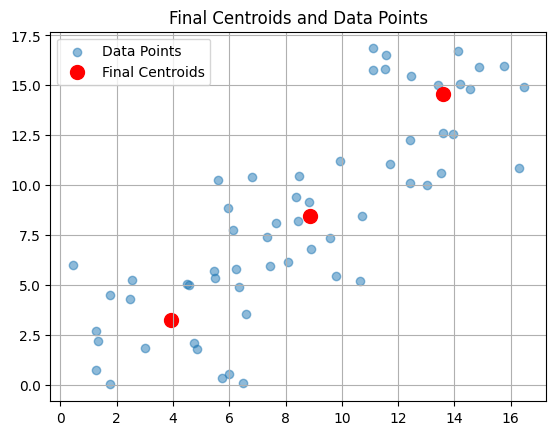

In [77]:

final_centroids,objective_value = fit(loaded_points, k ,100,0.0001)


plt.scatter(loaded_points[:, 0], loaded_points[:, 1], alpha=0.5, label='Data Points')
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], marker='o', color='red', s=100, label='Final Centroids')
plt.title('Final Centroids and Data Points')
plt.legend()
plt.grid(True)
plt.show()

# Evaluation methods - How to determine *k*?

## Elbow method

## Exercise 2 - Implementing an Elbow Method

In [108]:
k_all = range(2, 10)
all_objective = []

for k in k_all:
    _, objective_value = fit(loaded_points, k,100,0.000001)
    all_objective.append(objective_value)


Converged after 10 iterations.
Converged after 4 iterations.
Converged after 6 iterations.
Converged after 12 iterations.
Converged after 9 iterations.
Converged after 12 iterations.
Converged after 11 iterations.
Converged after 11 iterations.


Text(0, 0.5, 'Sum of squared distance')

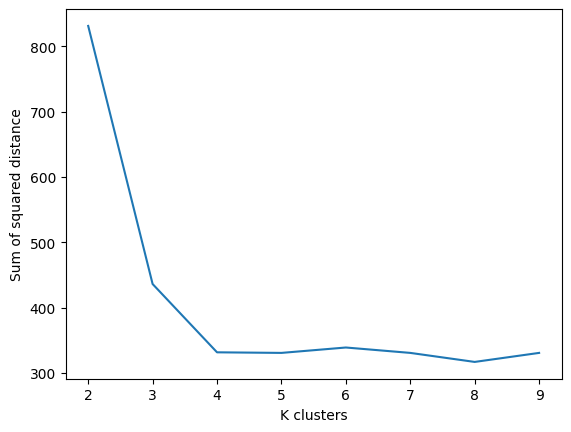

In [109]:
plt.figure()
plt.plot(k_all, all_objective)
plt.xlabel('K clusters')
plt.ylabel('Sum of squared distance')

# Exercise 3 - Image Compression

In [80]:
from matplotlib.image import imread
from sklearn.cluster import KMeans
import numpy as np

### 1. load image

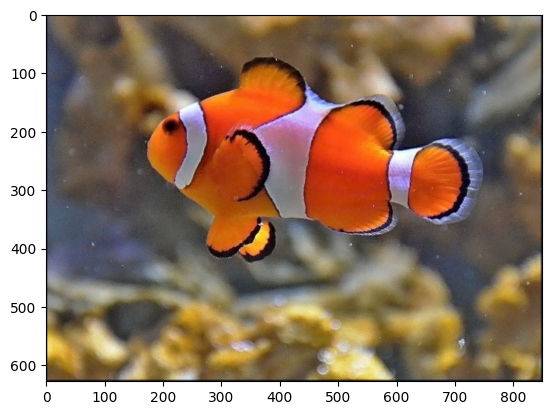

In [81]:
loaded_image = imread('/content/drive/MyDrive/Lab_02/Data/fish.jpg')

plt.imshow(loaded_image)
plt.show()

In [82]:
def compress_image(image: np.array, number_of_colours: int) -> np.array:
    """
    Compresses the given image by reducing the number of colours used in the image.

    This function applies k-means clustering to group the pixel colours of the image
    into 'number_of_colours' clusters. Each pixel's colour in the image is then replaced
    with the colour of the closest centroid of these clusters. This process effectively
    reduces the number of colours in the image, resulting in compression.

    Parameters:
    image (np.array): The original image is represented as a 3D numpy array
                      (height x width x color_channels).
    number_of_colours (int): The number of colours to reduce the image to.

    Returns:
    np.array: The compressed image as a numpy array in the same shape as the input.
    """

    image_reshaped = image.reshape(-1, image.shape[-1])

    kmeans = KMeans(n_clusters = number_of_colours)

    kmeans.fit(image_reshaped)

    new_colors = np.round(kmeans.cluster_centers_).astype(np.uint8)

    compressed_image_reshaped = new_colors[kmeans.labels_]

    image = compressed_image_reshaped.reshape(image.shape)


    return image


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


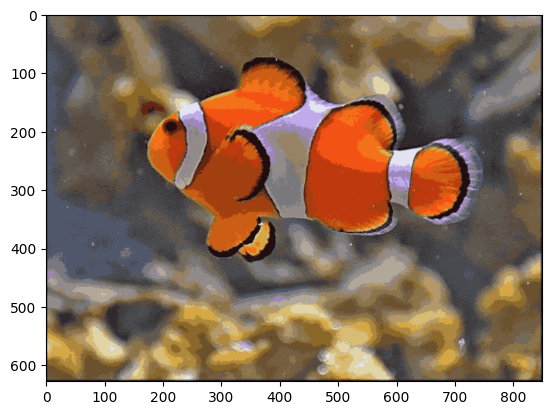

In [83]:
img = compress_image(loaded_image, 30)

plt.figure()
plt.imshow(img)
plt.show()